#### Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Carregando os dados

In [2]:
actors = pd.read_csv('actors.csv')
countries = pd.read_csv('countries.csv')
crew = pd.read_csv('crew.csv')
genres = pd.read_csv('genres.csv')
languages = pd.read_csv('languages.csv')
movies = pd.read_csv('movies.csv')
releases = pd.read_csv('releases.csv')
studios = pd.read_csv('studios.csv')
themes = pd.read_csv('themes.csv')

#### Exploração inicial dos dados

In [4]:
movies.head()

,id,name,date,tagline,description,minute,rating
0,1000001,Barbie,2023.0,She's everything. He's just Ken.,Barbie and Ken are having the time of their li...,114.0,3.86
1,1000002,Parasite,2019.0,Act like you own the place.,"All unemployed, Ki-taek's family takes peculia...",133.0,4.56
2,1000003,Everything Everywhere All at Once,2022.0,The universe is so much bigger than you realize.,An aging Chinese immigrant is swept up in an i...,140.0,4.30
3,1000004,Fight Club,1999.0,Mischief. Mayhem. Soap.,A ticking-time-bomb insomniac and a slippery s...,139.0,4.27
4,1000005,La La Land,2016.0,Here's to the fools who dream.,"Mia, an aspiring actress, serves lattes to mov...",129.0,4.09


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941597 entries, 0 to 941596
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   id           941597 non-null  int64  
 1   name         941587 non-null  object 
 2   date         849684 non-null  float64
 3   tagline      139387 non-null  object 
 4   description  780785 non-null  object 
 5   minute       760027 non-null  float64
 6   rating       90999 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 50.3+ MB


In [6]:
movies.describe(include='all')

,id,name,date,tagline,description,minute,rating
count,9.415970e+05,941587,849684.000000,139387,780785,760027.000000,90999.000000
unique,NaN,795421,NaN,135521,763348,NaN,NaN
top,NaN,Home,NaN,animation short,Mexican feature film,NaN,NaN
freq,NaN,143,NaN,100,893,NaN,NaN
mean,1.470799e+06,NaN,1998.522300,NaN,NaN,65.776516,3.244043
std,2.718158e+05,NaN,27.534865,NaN,NaN,154.828161,0.417281
min,1.000001e+06,NaN,1874.000000,NaN,NaN,1.000000,0.880000
25%,1.235400e+06,NaN,1986.000000,NaN,NaN,15.000000,3.020000
50%,1.470799e+06,NaN,2010.000000,NaN,NaN,62.000000,3.300000
75%,1.706198e+06,NaN,2019.000000,NaN,NaN,92.000000,3.510000


In [7]:
movies.isnull().sum()

id                  0
name               10
date            91913
tagline        802210
description    160812
minute         181570
rating         850598
dtype: int64

In [12]:
movies = movies.dropna(subset=['name', 'rating'])

In [15]:
movies = movies.drop(columns=['tagline'])

In [16]:
print("Média:", movies['minute'].mean())
print("Mediana:", movies['minute'].median())
print("Moda:", movies['minute'].mode().iloc[0])

Média: 100.70987565625863
Mediana: 94.0
Moda: 90.0


In [17]:
mediana_duracao = movies['minute'].median()
movies['minute'] = movies['minute'].fillna(mediana_duracao)

In [18]:
movies.isnull().sum()

id               0
name             0
date             0
description    596
minute           0
rating           0
dtype: int64

In [57]:
movies = movies[movies['minute'] < 1000]

##### Removendo entradas órfãs 

In [19]:
valid_ids = set(movies['id'])

In [21]:
actors = actors[actors['id'].isin(valid_ids)]

In [22]:
crew = crew[crew['id'].isin(valid_ids)]

In [23]:
genres = genres[genres['id'].isin(valid_ids)]

In [24]:
languages = languages[languages['id'].isin(valid_ids)]

In [25]:
themes = themes[themes['id'].isin(valid_ids)]

In [26]:
releases = releases[releases['id'].isin(valid_ids)]

In [27]:
for df in [studios, crew, actors, genres, themes, languages, releases]:
    df.rename(columns={'id': 'movie_id'}, inplace=True)

C:\Users\cauer\AppData\Local\Temp\ipykernel_7116\1435335708.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'id': 'movie_id'}, inplace=True)


In [28]:
print(actors.columns)

Index(['movie_id', 'name', 'role'], dtype='object')


#### Análise

In [52]:
def aplicar_tema_letterboxd():
    verde_letterboxd = '#00E054'
    fundo_preto = '#121212'
    cinza_claro = '#CCCCCC'
    grade = '#444444'

    plt.rcParams.update({
        'axes.facecolor': fundo_preto,
        'axes.edgecolor': cinza_claro,
        'axes.labelcolor': cinza_claro,
        'axes.titlesize': 14,
        'axes.titleweight': 'bold',
        'axes.titlecolor': cinza_claro,
        'figure.facecolor': fundo_preto,
        'figure.edgecolor': fundo_preto,
        'grid.color': grade,
        'grid.alpha': 0.5,
        'text.color': cinza_claro,
        'xtick.color': cinza_claro,
        'ytick.color': cinza_claro,
        'xtick.labelsize': 10,
        'ytick.labelsize': 10,
        'font.size': 12
    })

    sns.set_style("darkgrid", {
        "axes.facecolor": fundo_preto,
        "grid.color": grade,
        "xtick.color": cinza_claro,
        "ytick.color": cinza_claro,
        "text.color": cinza_claro
    })

    def aplicar_cores_eixos(fig):
        for ax in fig.axes:
            ax.xaxis.label.set_color(cinza_claro)
            ax.yaxis.label.set_color(cinza_claro)

    old_show = plt.show
    def new_show(*args, **kwargs):
        fig = plt.gcf()
        aplicar_cores_eixos(fig)
        return old_show(*args, **kwargs)
    
    plt.show = new_show

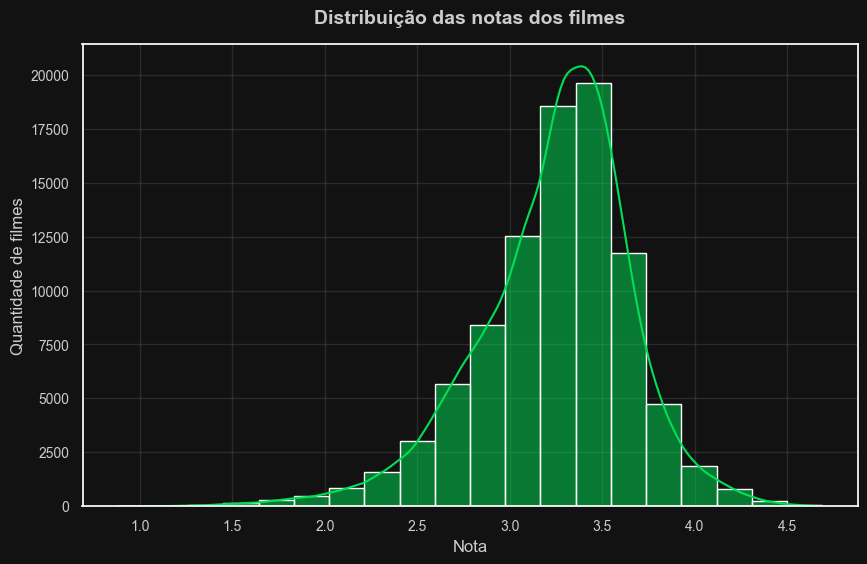

In [60]:
aplicar_tema_letterboxd()

plt.figure(figsize=(10, 6), facecolor='#121212')
sns.histplot(movies['rating'], bins=20, kde=True, color='#00E054')

plt.title('Distribuição das notas dos filmes')
plt.xlabel('Nota')
plt.ylabel('Quantidade de filmes')
plt.show()

O gráfico acima mostra a distribuição das avaliações dos filmes presentes no dataset. É possível observar que a maior parte dos filmes recebe notas entre 3.0 e 4.0, com uma concentração maior em torno de 3.5. Isso indica uma tendência de avaliações neutras ou levemente positivas, o que é comum em plataformas públicas onde os usuários tendem a assistir — e avaliar — filmes que já têm algum apelo ou reputação.

A presença de poucos filmes com notas muito baixas (abaixo de 2.0) sugere que títulos considerados ruins podem não ser assistidos ou avaliados com tanta frequência. Por outro lado, filmes com notas extremamente altas (acima de 4.5) também são raros, indicando que avaliações excepcionalmente boas são restritas a poucos títulos.

A curva levemente assimétrica revela um viés positivo nas notas, possivelmente refletindo tanto a curadoria do acervo quanto o comportamento do público em geral.

#### Top 1% e Bottom 1%

In [44]:
top_1_limite = movies['rating'].quantile(0.99)
bottom_1_limite = movies['rating'].quantile(0.01)

print(f"Top 1%: notas acima de {top_1_limite:.2f}")
print(f"Bottom 1%: notas abaixo de {bottom_1_limite:.2f}")

Top 1%: notas acima de 4.15
Bottom 1%: notas abaixo de 2.01


In [45]:
top_filmes = movies[movies['rating'] >= top_1_limite].sort_values(by='rating', ascending=False)
bottom_filmes = movies[movies['rating'] <= bottom_1_limite].sort_values(by='rating')

In [46]:
print("🎬 Filmes no Top 1% das notas:")
display(top_filmes[['name', 'date', 'rating']].head(10))

print("🗑️ Filmes no Bottom 1% das notas:")
display(bottom_filmes[['name', 'date', 'rating']].head(10))

🎬 Filmes no Top 1% das notas:


,name,date,rating
863,Harakiri,1962.0,4.69
1982,Band of Brothers,2001.0,4.69
1236,Stop Making Sense,1984.0,4.68
4267,Radiohead: In Rainbows – From the Basement,2008.0,4.66
1635,Cowboy Bebop,1998.0,4.65
3376,Fullmetal Alchemist: Brotherhood,2009.0,4.65
3223,No Half Measures: Creating the Final Season of...,2013.0,4.65
3447,Monster,2004.0,4.64
431,Come and See,1985.0,4.64
238,12 Angry Men,1957.0,4.62


🗑️ Filmes no Bottom 1% das notas:


,name,date,rating
4916,Dragonball Evolution,2009.0,0.88
2812,365 Days,2020.0,1.04
6746,365 Days: This Day,2022.0,1.06
1917,The Last Airbender,2010.0,1.07
9105,Swiped,2018.0,1.09
2638,Winnie the Pooh: Blood and Honey,2023.0,1.10
7935,Jeepers Creepers: Reborn,2022.0,1.11
6336,Disaster Movie,2008.0,1.14
3538,Slender Man,2018.0,1.18
15139,2025: The World Enslaved by a Virus,2021.0,1.19


In [47]:
top_1_limite = movies['rating'].quantile(0.99)
bottom_1_limite = movies['rating'].quantile(0.01)

In [48]:
top_movies = movies[movies['rating'] >= top_1_limite]
bottom_movies = movies[movies['rating'] <= bottom_1_limite]

In [49]:
# Top 1%
generos_top = genres.merge(top_movies, left_on='movie_id', right_on='id')

# Bottom 1%
generos_bottom = genres.merge(bottom_movies, left_on='movie_id', right_on='id')

In [50]:
top_counts = generos_top['genre'].value_counts()
bottom_counts = generos_bottom['genre'].value_counts()

comparacao_generos = pd.DataFrame({
    'Top 1%': top_counts,
    'Bottom 1%': bottom_counts
}).fillna(0).astype(int).sort_values(by='Top 1%', ascending=False)

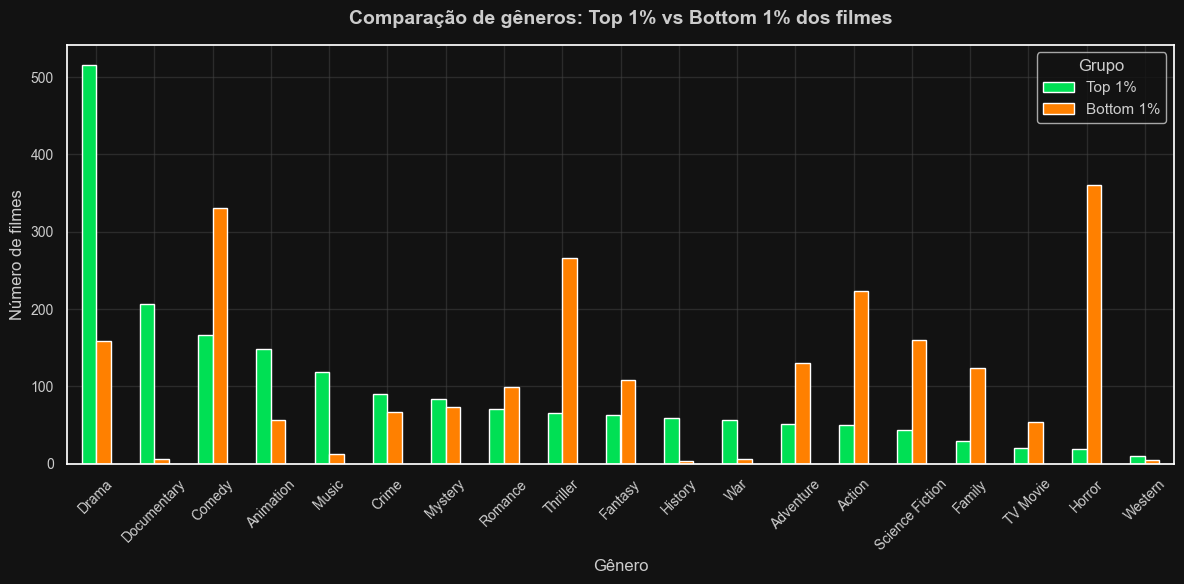

In [59]:
aplicar_tema_letterboxd()

fig, ax = plt.subplots(figsize=(12, 6), facecolor='#121212')  # <- fundo externo
comparacao_generos.plot(kind='bar', ax=ax, color=['#00E054', '#FF8000'])

ax.set_title('Comparação de gêneros: Top 1% vs Bottom 1% dos filmes')
ax.set_xlabel('Gênero')
ax.set_ylabel('Número de filmes')
ax.tick_params(axis='x', rotation=45)
ax.legend(title='Grupo')

plt.tight_layout()
plt.show()

O gráfico acima compara a distribuição dos gêneros cinematográficos entre os filmes com as melhores notas (Top 1%) e os com as piores notas (Bottom 1%) no dataset. É possível observar que drama se destaca fortemente entre os filmes bem avaliados, sendo o gênero mais recorrente nesse grupo. Outros gêneros como documentário, animação e música também apresentam presença significativa no Top 1%, sugerindo que obras com caráter mais autoral, reflexivo ou estético tendem a agradar mais o público.

Por outro lado, gêneros como terror (horror), thriller, TV movie e ação aparecem com muito mais frequência no Bottom 1%, o que pode indicar uma maior concentração de produções genéricas, de baixo orçamento ou com menor apelo crítico nesses estilos. O gênero comédia também se destaca negativamente, possivelmente por conta da subjetividade do humor e da dificuldade de agradar diferentes públicos.

Alguns gêneros como romance, crime e ficção científica aparecem em ambos os extremos, o que sugere que a avaliação depende muito mais da execução do que do gênero em si. De forma geral, a análise indica que gêneros mais profundos ou artísticos têm maior tendência a alcançar avaliações elevadas, enquanto estilos mais populares apresentam maior variabilidade e propensão a críticas negativas.